In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
from os.path import join as join
import sys

module_path = os.path.abspath(os.path.join('../../..'))

if module_path not in sys.path :
    sys.path.append(module_path)

     
import _ressources.chain as chain
import _ressources.tools as tools
import _ressources.lumenclass as lc
import _ressources.analysis_tools.analysis as an
import _ressources.network as net

from scipy.optimize import curve_fit


# Panel B

In [2]:
ms = 8
lw = 1
alpha=1

plot_param_list = {(5, 5) : ['#E54367', 's', ms, lw, alpha, '-.'], 
                   (50, 5) : ['#33BBEE', 'P', ms, lw, alpha, '--'], 
                   (50, 50) : ['#8DD800', 'o', ms, lw, alpha, '-.'], 
                   (500, 5) : ['#1433E4', 'D', ms, lw, alpha, '-.'],
                   (500, 50) : ['#FFD425', 'H', ms, lw, alpha, '--'], 
                   (500, 500) : ['#E90000', '<', ms, lw, alpha, 'dotted']
                   }

mu = 0.6105653703843762 # mu(pi/3)
eps = 1e-3

In [3]:
dat = {}
for key in plot_param_list.keys() :
    dat[key] = np.loadtxt('panelB_coarsening/chiv'+str(key[0])+'_chis'+str(key[1])+'.dat')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


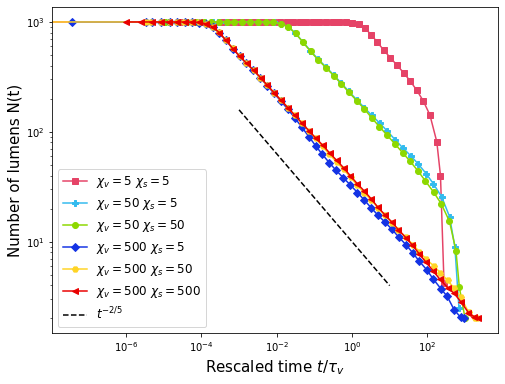

In [4]:
plt.figure(figsize=(8, 6))
plt.xscale('log')
plt.yscale('log')
for key in dat.keys() :
    label = r'$\chi_v = $'+str(key[0])+' $\chi_s = $'+str(key[1])
    plt.plot(dat[key][:, 0], dat[key][:, 1], color = plot_param_list[key][0], marker = plot_param_list[key][1], label = label)
    
t = np.logspace(-3, 1)
k, a = 10., -2./5
plt.plot(t, k*t**a, linestyle='--', label = r'$t^{-2/5}$', color = 'k')

plt.xlabel(r'Rescaled time $t/\tau_v$', fontsize=15)
plt.ylabel('Number of lumens N(t)', fontsize=15)
plt.legend(fontsize=12)
plt.savefig('figure4_panelB.eps', format='eps')
plt.show()

We rescaled $\xi_v$ such that 
$$\bar{\xi_v} = \sqrt{\frac{\xi_v^2}{L_0 \ell_0}}$$
and one has $\chi_v = \frac{\bar{\xi}_v}{\ell_0}$, thus, the non-dimensionalized screening is given by
$$ \xi_v= \sqrt{L_0 \ell_0^3 \chi_v^2} $$
The hydraulic time $T_h$ is defined as 
$$T_h = \frac{2 \tau_v}{\mu \epsilon \bar{\xi}_v^2} = \frac{2 \tau_v \ell_0 L_0}{\mu \epsilon \xi_v^2}$$

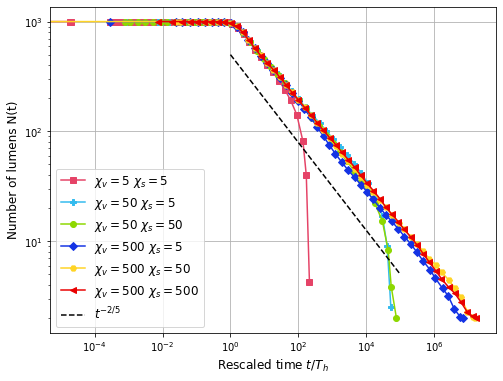

In [5]:
tauv = 1.
ell0, L0 = 10., np.sqrt(mu)

plt.figure(figsize=(8, 6))
plt.xscale('log')
plt.yscale('log')
for key in dat.keys() :
    label = r'$\chi_v = $'+str(key[0])+' $\chi_s = $'+str(key[1])
    xiv = np.sqrt(L0* float(key[0])**2 * ell0**3)
    Th = 2*tauv*ell0*L0 / (mu*eps*xiv**2)
    plt.plot(dat[key][:, 0] /Th, dat[key][:, 1], color = plot_param_list[key][0], marker = plot_param_list[key][1], label = label)
    
t = np.logspace(0, 5)
k, a = 500., -2./5
plt.plot(t, k*t**a, linestyle='--', label = r'$t^{-2/5}$', color = 'k')

plt.xlabel(r'Rescaled time $t/T_h$', fontsize=12)
plt.ylabel('Number of lumens N(t)', fontsize=12)
plt.grid()

plt.legend(fontsize=12)
plt.show()

# Panel C

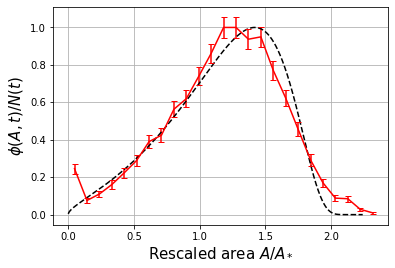

In [6]:
# AREAS    
def g(z, C=27./10, zmax=9./4) :
    return (5*C - 8*z**(3./2))/(4*z**(5./2) + 10*C*z*(1-np.sqrt(z)))

def calc_fz(z, dz, z0=1e-6) :    
    sol = [z0]
    for i in range(1, len(z)) :
        sol += [sol[i-1] + dz*g(z[i-1])*sol[i-1]]
    
    Z = np.sum(sol)
    sol = np.array(sol) / Z
    return sol

z = np.linspace(0.001, 9./4.-1e-2, 1000)
dz = z[1]-z[0]
sol = calc_fz(z, dz)
gamma = 0.846          # cf Gratton, Witelski, 2009


plt.plot(z, sol/np.max(sol), color='k', linestyle='--')

distrib = np.loadtxt('distrib_panelC.txt')
plt.errorbar(distrib[:, 0] / (gamma*np.average(distrib[:, 0])), distrib[:, 1]/np.max(distrib[:, 1]), yerr = distrib[:, 2], color='r', capsize=3, capthick=1)

plt.xlabel(r'Rescaled area $A / A_*$', fontsize=15)
plt.ylabel(r'$\phi(A, t)/N(t)$', fontsize=15)
plt.grid()
plt.savefig('figure4_panelC.eps', format='eps')
plt.show()


Lumen area distribution $\phi(A,t)$ as function of rescaled area $A/A_*$, where $A_* = \int_0^\infty dA A \phi(A,t)dA$ is the mean field area with respect to this distribution. The plain curve is an average over 100 simulations with $\chi_v =500, \chi_s =5$.
The dashed line corresponds to the analytical limit found in the self-similar regime assuming mean-field interaction between the lumens.
$$\frac{d f_d}{dz} = \left[ \frac{\frac{4C}{d.\beta} - 8z^{\frac{d+1}{d}}}{4 z^{\frac{2d+1}{d}} + \frac{4C}{\beta} z (1-z^{1/d})} \right] f_d(z)$$
where $z = A/A_*$, d=2, $\beta = \frac{2}{5}$, $C = \frac{27}{10}$, on support $[0, z_{\max}[$, with $z_{\max} = \frac{9}{4}$.
Calculation of this expression can be found in the Supplementary Information, and was done in the case $d=2$ in **Gratton, Witelski, Physica D, 2009**.

# Panel D

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


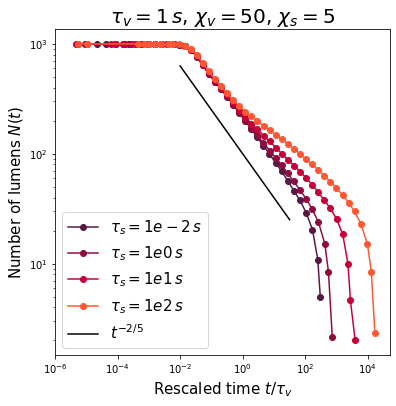

In [7]:
plt.figure(figsize = (6, 6))

plt.xscale('log')
plt.yscale('log')

clist = ['#581845', '#900C3F', '#C70039', '#FF5733', '#FFC300', 'k']
c = 0
for taus in ['1e-2', '1e0', '1e1', '1e2'] :
    res_avg = np.loadtxt('panelD_trapped/Nt_taus'+taus+'.txt')
    plt.plot(res_avg[:, 0], res_avg[:, 1], marker='o', color=clist[c], label = r'$\tau_s = '+taus+' \,s$')
    c += 1



t1 = np.logspace(-2., 1.5, 101)
k1, a1 = 100., -2/5.
plt.plot(t1, k1*t1**a1, label=r'$t^{-2/5}$', color='k')

plt.xlabel(r'Rescaled time $t/\tau_v$', fontsize=15)
plt.ylabel(r'Number of lumens $N(t)$', fontsize=15)

plt.legend(fontsize=15)
plt.title(r'$\tau_v=1\,s$, $\chi_v=50$, $\chi_s = 5$', fontsize=20)

plt.savefig('figure4_panelD.eps', format='eps')

plt.xlim(1e-6, 5e4)

plt.show()


Plot of the number of lumens as function of the rescaled time $t/\tau_v$ for $\tau_v =1s$, $\chi_v =50$, $\chi_s =5$ and increasing values of the solute relaxation time $\tau_s$from $10^{−2}$ s to $10^2$ s. A deviation from the scaling law $t^{−2/5}$ (plotted in plain line as a reference) is observed for large $\tau_s$, indicative of an osmotic  stabilization effect, which slows down the coarsening.